# Fitbit Data Analysis 🏃‍♂️📊

In [1]:
import json
import gzip
import pandas as pd
from datetime import datetime, timedelta
import boto3
from io import BytesIO

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.dates import DateFormatter
import seaborn as sns

In [3]:
# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

#### =============================================================================
## Bucket

In [4]:
session = boto3.Session(profile_name='surface')
s3 = session.client('s3')

In [5]:
bucket_name = 'followcrom'
prefix = 'cromwell/fitbit/'

#### =============================================================================
## Files

In [6]:
s3response = s3.list_objects_v2(Bucket=bucket_name, Prefix=prefix)
files = [obj['Key'] for obj in s3response.get('Contents', [])]
files

['cromwell/fitbit/',
 'cromwell/fitbit/fitbit_backup_2025-10-03.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-04.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-05.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-06.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-07.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-08.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-09.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-10.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-11.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-12.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-13.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-14.json.gz']

#### =============================================================================
## Select Date

In [7]:
file_key = 'cromwell/fitbit/fitbit_backup_2025-10-10.json.gz'

In [8]:
response = s3.get_object(Bucket=bucket_name, Key=file_key)
with gzip.GzipFile(fileobj=BytesIO(response['Body'].read())) as f:
    data = json.load(f)
print(f"Loaded {len(data):,} records")

Loaded 39,865 records


#### =============================================================================
## All DFs

In [9]:
from functions.parse_data import parse_fitbit_data

In [10]:
# Parse all data
dfs = parse_fitbit_data(data)

# Display summary
print("\n📊 Available DataFrames:")
print("="*60)
for name, df in dfs.items():
    print(f"{name:30s} | {len(df):6d} records | Columns: {list(df.columns)}")


📊 Available DataFrames:
HeartRate_Intraday             |  38356 records | Columns: ['time', 'Device', 'value']
Steps_Intraday                 |   1440 records | Columns: ['time', 'Device', 'value']
HRV                            |      1 records | Columns: ['time', 'Device', 'dailyRmssd', 'deepRmssd']
BreathingRate                  |      1 records | Columns: ['time', 'Device', 'value']
SkinTemperature                |      1 records | Columns: ['time', 'Device', 'nightlyRelative']
Activity-minutesSedentary      |      1 records | Columns: ['time', 'Device', 'value']
Activity-minutesLightlyActive  |      1 records | Columns: ['time', 'Device', 'value']
Activity-minutesFairlyActive   |      1 records | Columns: ['time', 'Device', 'value']
Activity-minutesVeryActive     |      1 records | Columns: ['time', 'Device', 'value']
Activity-steps                 |      1 records | Columns: ['time', 'Device', 'value']
Activity-calories              |      1 records | Columns: ['time', 'Device',

#### =============================================================================
## HR DFs

In [11]:
df_hr_intra = dfs.get('HeartRate_Intraday', pd.DataFrame())
df_steps_intra = dfs.get('Steps_Intraday', pd.DataFrame())
df_hrv = dfs.get('HRV', pd.DataFrame())
df_breathing_rate = dfs.get('BreathingRate', pd.DataFrame())
df_skin_temp = dfs.get('SkinTemperature', pd.DataFrame())
df_sedentary = dfs.get('Activity-minutesSedentary', pd.DataFrame())
df_light = dfs.get('Activity-minutesLightlyActive', pd.DataFrame())
df_fairly = dfs.get('Activity-minutesFairlyActive', pd.DataFrame())
df_very = dfs.get('Activity-minutesVeryActive', pd.DataFrame())
df_steps = dfs.get('Activity-steps', pd.DataFrame())
df_calories = dfs.get('Activity-calories', pd.DataFrame())
df_distance = dfs.get('Activity-distance', pd.DataFrame())
df_hr_zones = dfs.get('HR_Zones', pd.DataFrame())
df_resting_hr = dfs.get('RestingHR', pd.DataFrame())
df_sleep_levels = dfs.get('SleepLevels', pd.DataFrame())
df_sleep_summary = dfs.get('SleepSummary', pd.DataFrame())
df_activity = dfs.get('ActivityRecords', pd.DataFrame())

print(f"✅ Found {len(df_hr_intra)} HeartRate_Intraday records")
print(f"✅ Found {len(df_steps_intra)} Steps_Intraday record")
print(f"✅ Found {len(df_hrv)} HRV record")
print(f"✅ Found {len(df_breathing_rate)} BreathingRate records")
print(f"✅ Found {len(df_skin_temp)} SkinTemperature record")
print(f"✅ Found {len(df_sedentary)} minutesSedentary-minutesSedentary record")
print(f"✅ Found {len(df_light)} minutesLightlyActive records")
print(f"✅ Found {len(df_fairly)} minutesFairlyActive record")
print(f"✅ Found {len(df_very)} minutesVeryActive record")
print(f"✅ Found {len(df_steps)} ctivity-steps records")
print(f"✅ Found {len(df_calories)} Activity-calories record")
print(f"✅ Found {len(df_distance)} Activity-distance record")
print(f"✅ Found {len(df_hr_zones)} HR_Zones records")
print(f"✅ Found {len(df_resting_hr)} RestingHR record")
print(f"✅ Found {len(df_sleep_levels)} SleepLevels records")
print(f"✅ Found {len(df_sleep_summary)} SleepSummary record")
print(f"✅ Found {len(df_activity)} ActivityRecords record")

✅ Found 38356 HeartRate_Intraday records
✅ Found 1440 Steps_Intraday record
✅ Found 1 HRV record
✅ Found 1 BreathingRate records
✅ Found 1 SkinTemperature record
✅ Found 1 minutesSedentary-minutesSedentary record
✅ Found 1 minutesLightlyActive records
✅ Found 1 minutesFairlyActive record
✅ Found 1 minutesVeryActive record
✅ Found 1 ctivity-steps records
✅ Found 1 Activity-calories record
✅ Found 1 Activity-distance record
✅ Found 1 HR_Zones records
✅ Found 1 RestingHR record
✅ Found 54 SleepLevels records
✅ Found 1 SleepSummary record
✅ Found 1 ActivityRecords record


In [12]:
from functions.various.various_metrics_functions import (
    plot_activity_hr_correlation,
    plot_sleep_analysis,
    plot_activity_summary_wheel,
    plot_recovery_readiness
)

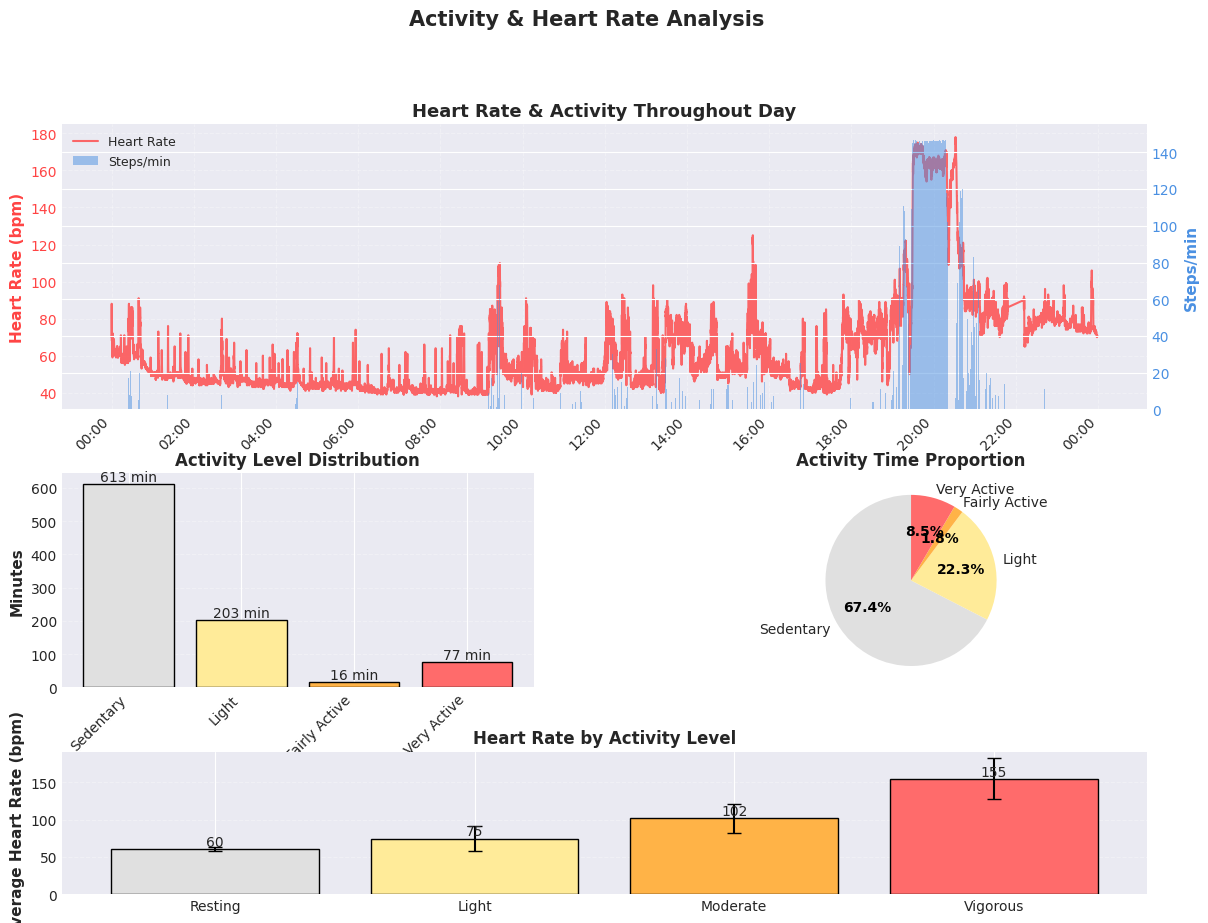

In [13]:
fig3 = plot_activity_hr_correlation(
    df_hr_intra, df_steps_intra,
    df_sedentary, df_light, df_fairly, df_very
)
plt.show()

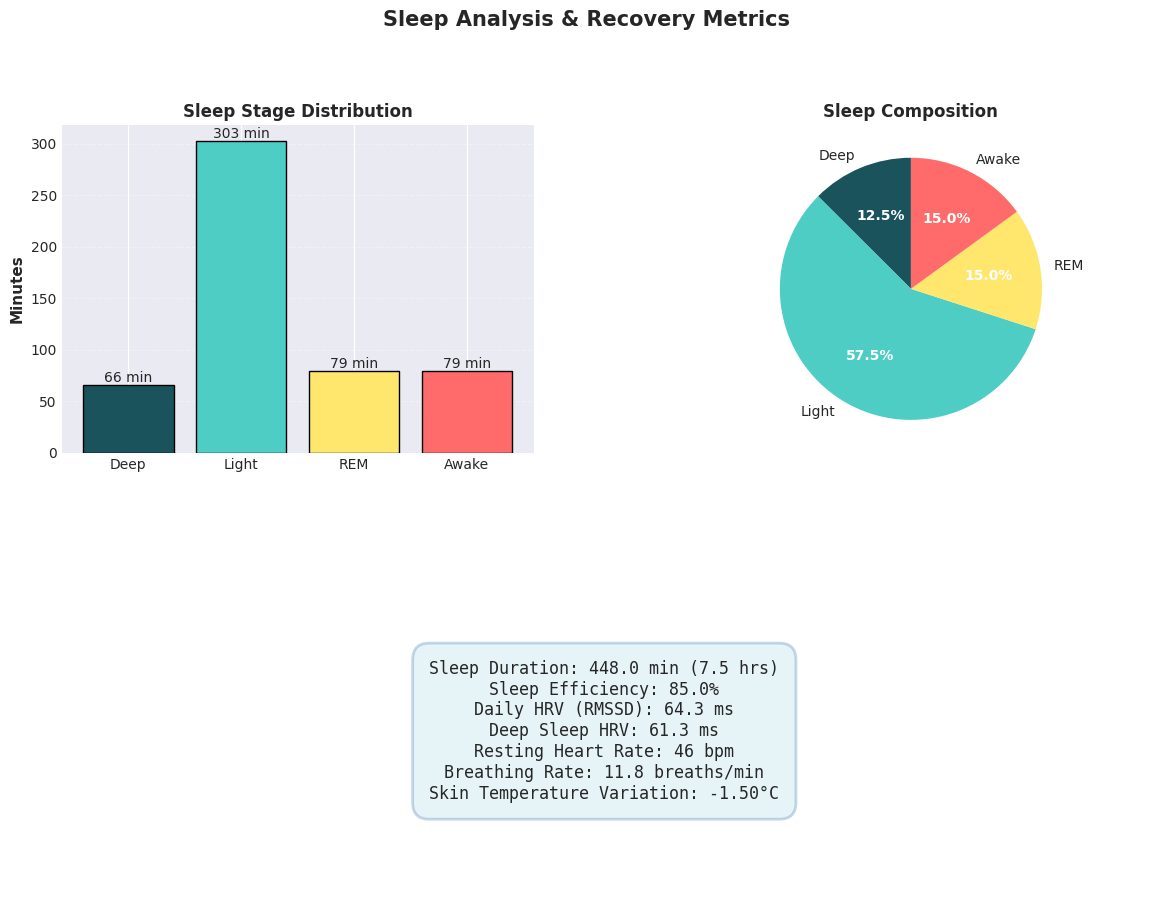

In [14]:
# Option 4: Sleep Analysis
fig4 = plot_sleep_analysis(
    df_sleep_levels, df_sleep_summary, df_hrv,
    df_resting_hr, df_breathing_rate, df_skin_temp
)
plt.show()

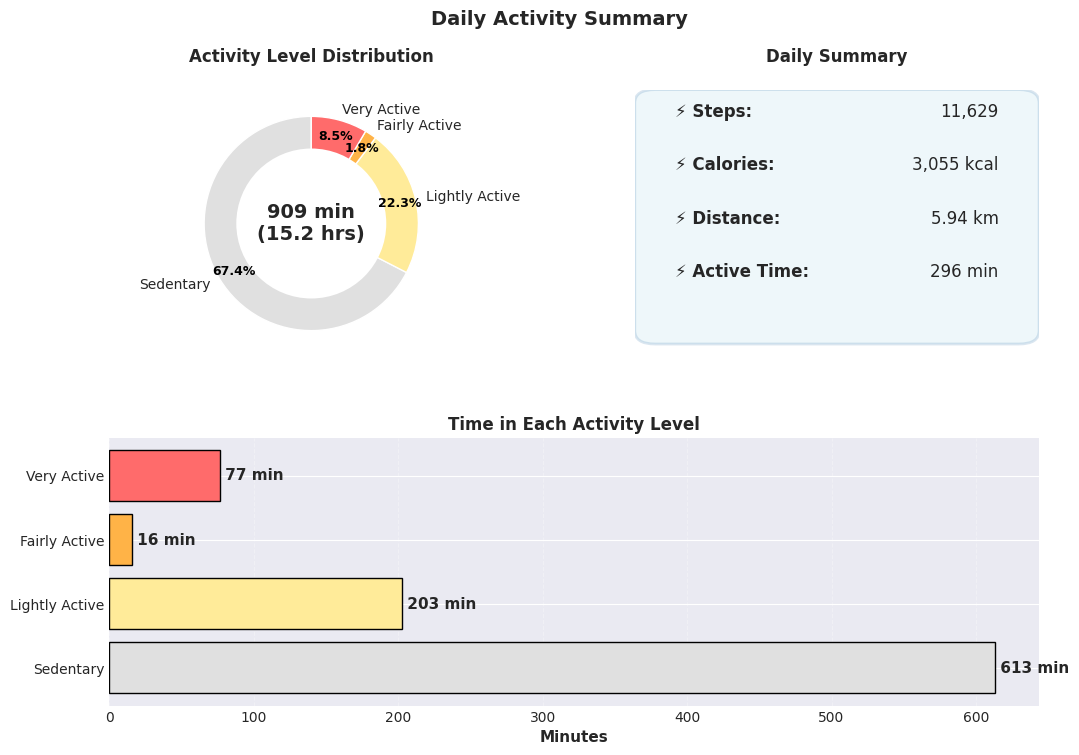

In [15]:
# Option 5: Activity Summary Wheel
fig5 = plot_activity_summary_wheel(
    df_sedentary, df_light, df_fairly, df_very,
    df_steps, df_calories, df_distance
)
plt.show()

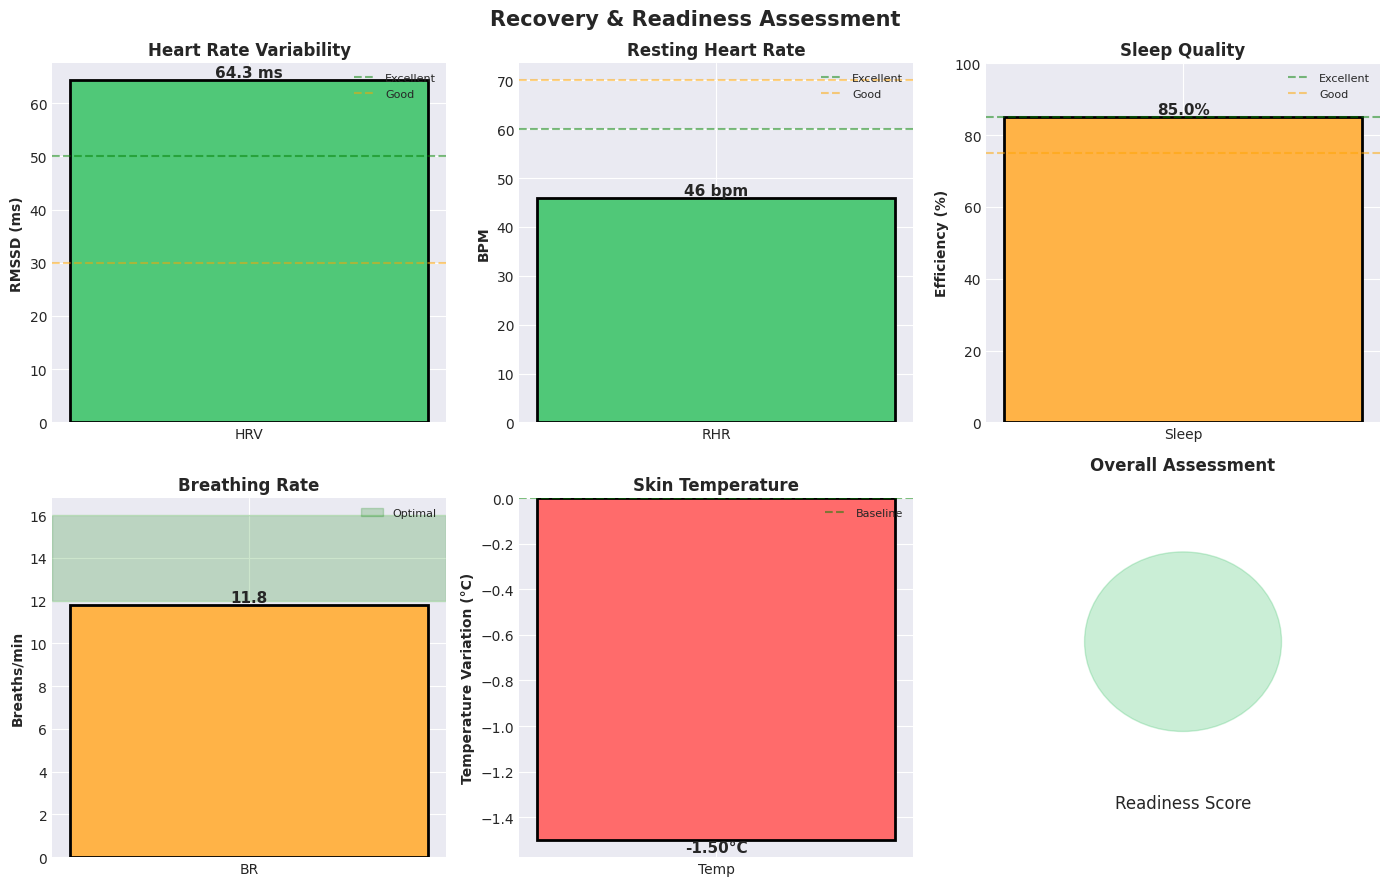

In [16]:
# Option 7: Recovery & Readiness
fig7 = plot_recovery_readiness(
    df_hrv, df_resting_hr, df_sleep_summary,
    df_breathing_rate, df_skin_temp
)
plt.show()